<a href="https://colab.research.google.com/github/spe-nsi/presentation-seconde/blob/master/CVS_lecture_requetes_tris_1_sujet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font color="darkyellow" size="4"><b> ⚠️⚠️⚠️   &nbsp; &nbsp;! Pensez à faire une copie <u>dans votre drive</u> avant de commencer !  &nbsp; &nbsp;⚠️⚠️⚠️</b></font></center>

<center><font color="orange" size="6"><b>Les données structurées au format CSV (1ère partie)

<font color="orange" size="6">① Lecture &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
② requêtes &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 ③ Tris</b></font></center>



Après avoir découvert le format CSV, nous allons maintenant, à l'aide de Python, apprendre à effectuer des traitements sur ces données.  

Pour traiter des données, nous allons utiliser la bibliothèque Python csv. 

##  ⚠️ Attention il ne faut jamais utiliser un tableur dans ce cours

Pour nos premiers pas avec csv, nous allons utiliser des données très simples au format CSV : ces données sont contenues dans le fichier à télécharger: [personnes.csv](https://drive.google.com/file/d/1feD9WnZdobmybqzUbIIr0mXH0OPk7nY2/view?usp=sharing) 

<font color="red">importez ce fichier dans la session pour démarrer</font>



---

<font color="orange" size="6"><b>I. Lecture d'un fichier csv</b></font>


---



<font color="orange" size="5"><b>1. Méthode avec csv.reader</b></font>



<font color="orange" size="4"><b>a) Lire et comprendre le fichier csv comme une liste de listes</b></font>




⏬ Après avoir importé dans la session le fichier `personnes.csv`, exécutez le code ci-dessous

In [ ]:
import csv
with open('personnes.csv', mode = "r" , encoding='utf-8' , newline = '') as csvFile :
    reader = csv.reader(csvFile)
    lu = [ligne for ligne in reader]

# voyons le résutat :
print(lu)
for ligne in lu :
    print(ligne)

[['nom', 'prenom', 'age'], ['Durand', 'Jean-Pierre', '32'], ['Dupont', 'Christophe', '51'], ['Terta', 'Henry', '37'], ['Kapri', 'Leon', '45'], ['Lenard', 'Michel', '17'], ['Lenard', 'Georges', '15'], ['Herpan', 'stephan', '22'], ['Mastic', 'Brice', '61'], ['Pouyeau', 'Maxime', '27'], ['Arox', 'Gilles', '51'], ['Follin', 'Paul', '32']]
['nom', 'prenom', 'age']
['Durand', 'Jean-Pierre', '32']
['Dupont', 'Christophe', '51']
['Terta', 'Henry', '37']
['Kapri', 'Leon', '45']
['Lenard', 'Michel', '17']
['Lenard', 'Georges', '15']
['Herpan', 'stephan', '22']
['Mastic', 'Brice', '61']
['Pouyeau', 'Maxime', '27']
['Arox', 'Gilles', '51']
['Follin', 'Paul', '32']


Le code ci-dessus est très simple :  
  
- **import** Avec la première ligne, nous importons la bibliothèque `csv`.
- **open** ouvre le fichier en lecture (mode = "r" pour read) -> cvsFile (objet de type objFile)
- **initialisation** du lecteur (reader) de csvFile.
- **lecture ligne par ligne** la boucle for permet d'énumérer les différentes lignes de csvFile.

La première liste affichée correspondant au nom des entêtes des colonnes (les **descripteurs**)

<font color="orange" size="4">➽ Ecrire une fonction qui lit un fichier et renvoie la liste de listes</font>

In [ ]:
def readCSV1(filename: str ) -> list :
    '''
    Entrée : nom d'un fichier CSV
    Sortie : la fonction renvoie les données lues dans une liste de listes
    '''
    pass

✅ vérification

In [ ]:
personnes = readCSV1('personnes.csv')
assert personnes == [['nom', 'prenom', 'age'], ['Durand', 'Jean-Pierre', '32'], ['Dupont', 'Christophe', '51'], ['Terta', 'Henry', '37'], ['Kapri', 'Leon', '45'], ['Lenard', 'Georges', '15'], ['Herpan', 'stephan', '22'], ['Mastic', 'Brice', '61'], ['Pouyeau', 'Maxime', '27'], ['Arox', 'Gilles', '51'], ['Follin', 'Paul', '32']]

<font color="orange" size="5"><b>2. Méthode avec csv.DictReader</b></font>

<font color="orange" size="4"><b>a) Lire et comprendre le fichier csv en utilisant une liste de dictionnaires</b></font>

In [ ]:
import csv
with open('personnes.csv', mode = "r" , newline = '') as csvFile :
    reader = csv.DictReader(csvFile)
    lu = [dict(ligne) for ligne in reader]

# voyons le résutat :
print(lu)


[{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}, {'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}, {'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}, {'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}, {'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}, {'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}, {'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}, {'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}, {'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}, {'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}, {'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}]


 Plutôt qu’une liste de listes, une instruction permet d’obtenir chaque enregistrement au format dictionnaire : **dict**.


```
On obtient ainsi une liste de dictionnaires, à savoir :
	listeDico = [ {clé1:enr1_val1, clé2:enr1_val2, …},
	  {clé1:enr2_val1, clé2:enr2_val2, …},
	  {clé1:enr3_val1, clé2:enr3_val2, …} ]
```

Une telle structure est mieux adaptée. D'une part, les en-têtes (**descripteurs**) ne sont plus lus comme une ligne banale mais sont utilisées comme clefs dans les dictionnaires. D'autre part, chaque élément *listeDico[i]* est un dictionnaire et il sera plus facile de manipuler :
```
listeDico[i] = {'classe':'TG1' , 'nb_elev':'34', 'nb_garçons':'16' , 'nb_filles':'18' , 'nb_admis':'33', …}
plutôt que  : listeDico[i] = ['TG1','34',  16 ,  18 , '33', …]
```

Dans un fichier avec beaucoup de colonnes, il est assez fastidieux de se souvenir a quoi correspond l'indice d'une colonne. dans l'exemple, *listeDico[i][3]* est le nombre de filles, tandis que avec le dictionnaire on écrira *listeDico[i]['nb_filles']*. Et imaginez quand il y a beaucoup de colonnes, comme il est difficile de retrouver quel indice de colonne correspond à quoi...



<font color="orange" size="4">➽ Ecrire une fonction qui lit un fichier et renvoie la liste de dictionnaires</font>

In [ ]:
def readCSV( filename:str ) -> list :
    '''
    Entrée : nom d'un fichier CSV
    Sortie : la fonction renvoie les données lues dans une liste de dictionnaires
    '''
    pass
    

✅ vérification

In [ ]:
personnes = readCSV('personnes.csv')
for elem in personnes :
    print(elem)
assert personnes == [{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}, {'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}, {'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}, {'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}, {'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}, {'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}, {'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}, {'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}, {'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}, {'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}, {'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}]

nombre d'enregistrements lus :  11
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}


<center><font size="5" color="darkyellow">RETENIR</font>

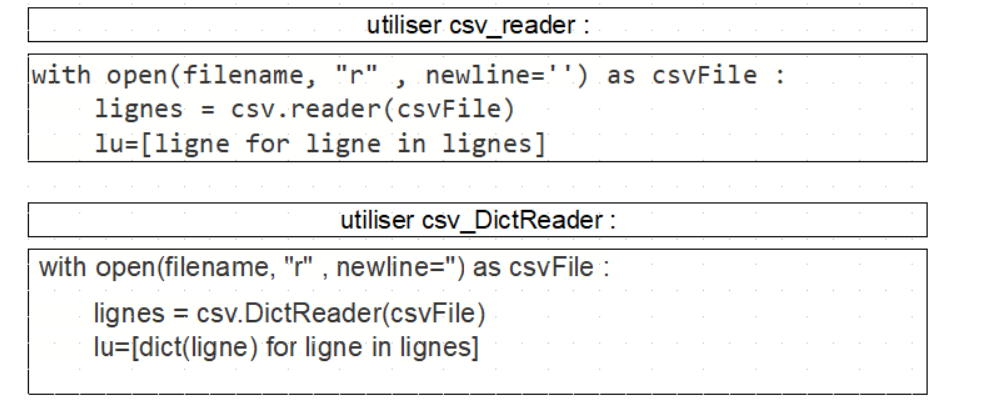

Quelle est la différence entre `csv.reader(mon_fichier)` et `csv.DictReader(mon_fichier)` ?

Réponse : 



---

<font color="orange" size="6"><b>II. Extraire des données suivant certains critères</b></font>


---



Nous désirons sélectionner des données suivant un certain critère, par exemple trouver tous les renseignements de M. Herpan, ou trouver toutes les personnes âgées de moins de 30 ans... Quelle syntaxe allons-nous choisir?

<font color="orange" size="5"><b>1. Trouver tous les renseignements des personnes portant le nom "Lenard"</b></font> 

In [ ]:
infos = [p for p in personnes if p['nom'] == 'Lenard']
for elem in infos :
    print(elem)

{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}


Dans ce premier exemple on a sélectionné tous les informations, donc on prend, **pour chaque dictionnaire p** de la **liste**, tout le dictionnaire. 

En revanche on a mis un critère de sélection sur le nom

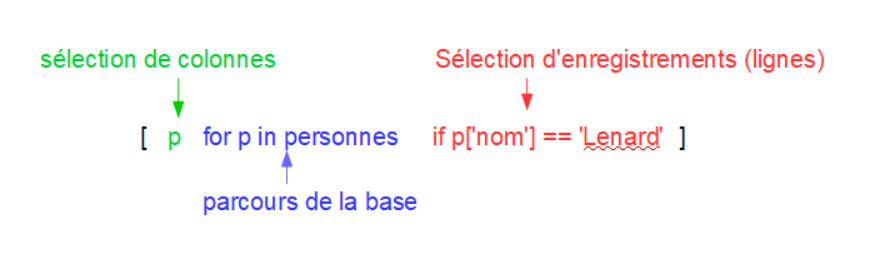

Si on voulait extraire par exemple selmement la colonne **nom** on prendrait **p['nom']** qui est **la valeur de la clé nom** de chaque dictionnaire p de la base :

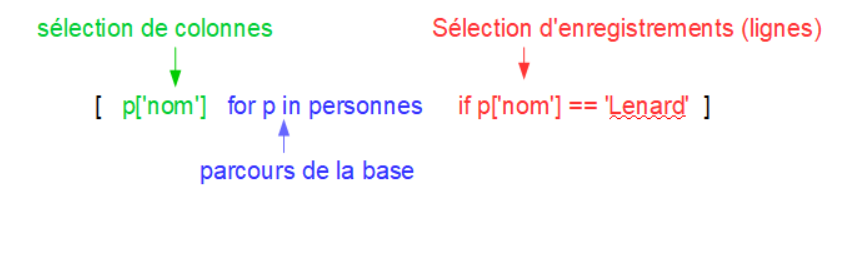

<center><font color="darkyellow" size="6"> ⚠️</font> 

Ici le résultat est une **liste** de noms, et pas une liste de dictionnaire. On pourrait souhaiter (et ce sera souvent utile) conserver la structure en liste de dictionnaire, de la façon suivante :

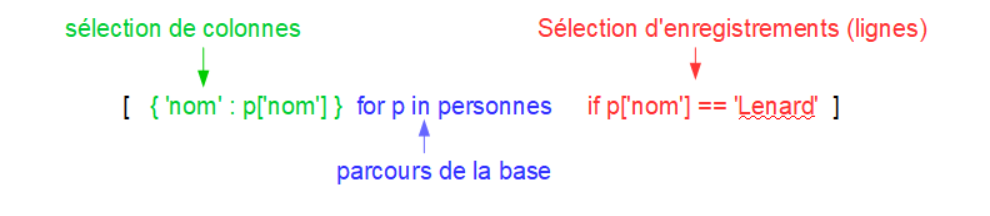

On pourrait aussi extraite une seule colonne, sans critère de sélection des enregistrements :

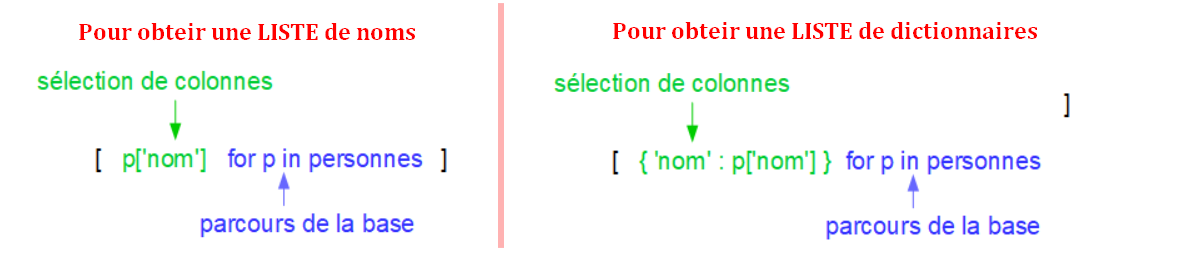

Ou bien pour sélectionner plusieurs colonnes :

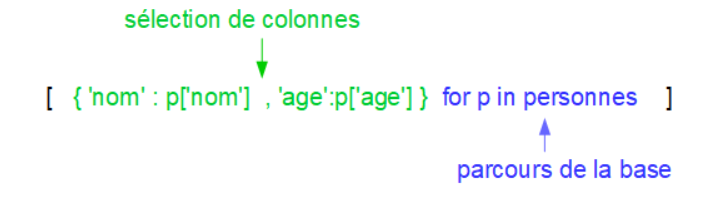

Rappel sur les contructions de listes, avec append ou en compréhension :

In [ ]:
l = []
for i in [3,4,7] :
    l.append(i)
print(l)

v = [i for i in range(10) if i%3 == 0]
print(v)

[3, 4, 7]
[0, 3, 6, 9]


<font color="orange" size="5"><b>2. Trouver tous les renseignements des personnes âgées de plus de 30 ans</b></font>

In [ ]:
plus30 = [ ... A VOUS ...]
for pers in plus30 :
    print(pers)

{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}


<font color="orange" size="4">➽ afficher les noms et prénoms des personnes de plus de 30 ans</font>

In [ ]:
# votre code


<font color="orange" size="4">➽ afficher les noms et prénoms des personnes dont le nom commence par M</font>

In [ ]:
# votre code


[('Lenard', 'Michel'), ('Lenard', 'Georges')]


<font color="orange" size="4">➽ afficher l'age moyen des personnes dans le fichier</font>

In [ ]:
# il faut extraire une liste des ages, puis calculer la moyenne avec sum() et len()


35.45454545454545


<font color="orange" size="4">➽ afficher tous les noms en ordre alphabétique</font>

In [ ]:
# il faut extraire une liste de noms puis trier avec .sort()
 

['Arox', 'Dupont', 'Durand', 'Follin', 'Herpan', 'Kapri', 'Lenard', 'Lenard', 'Mastic', 'Pouyeau', 'Terta']


<font color="orange" size="4">➽ afficher toutes les informations en triant les noms en ordre alphabétique</font>

In [ ]:
# si on essaye de trier avec sort() comme ci-dessus :
infos = [ p  for p in personnes   ]
infos.sort()
print( noms ) 
# essayez...

TypeError: ignored

In [ ]:
# une première solution : extraire les noms, trier la liste, puis
# parcourir la liste pour récuppérer et afficher les infos...
# mais....
noms = [p['nom'] for p in personnes]
noms.sort()
infos = []
for nom in noms :
    for p in personnes :
        if p['nom'] == nom :
            infos.append(p)
for elem in infos :
    print( elem ) 
# essayez...

{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}


Vous remarquez qu'on a doublonné Lenard Michel et Georges... pouvez expliquer pourquoi ?

Dans le corrigé vous verrez qu'on pourrait quand même s'en sortir avec cette approche. Mais c'est très inélégant, et très peu efficace...

Tout ceci est un peu fastidieux et ce n'est pas la bonne méthode pour trier nos données, mais pour vous en convaincre il fallait commencer ainsi...

Nous allons voir dans la deuxième partie la bonne façon d'opérer des tris.



---

<font color="orange" size="6"><b>III. Trier les données suivant certaines colonnes</b></font>


---



<font color="orange" size="4"><b>Tri sur un unique critère</b></font>

Reprenons notre tableau initial, nommé personnes :

In [ ]:
personnes = readCSV('personnes.csv')

Trier ce tableau avec personnes.sort() n'aurait aucun sens et provoque une erreur :

In [ ]:
personnes.sort()

TypeError: ignored

Comprenons bien ceci :
<font color="#ee3333">TypeError:</font> '<' not supported between instances of 'dict' and 'dict'

❓ Que nous dit l'interpréteur ?

Pour trier, il faut faire des comparaisons entre les éléments. Or ici, nos éléments sont des dictionnaires. 
'<' n'est pas possible entre *dict* et *dict*  : on ne peut comparer deux dictionnaires.

Et c'est assez logique, comment comparer Durand Jean-Pierre 32 ans et Tetra Henry 37 ans ? sur l'age ? le nom ? Nous n'avons pas précisé !

C'est ce que nous allons faire en définissant une 🔑 clé de tri
<center><font color="darkyellow" size="5">RETENIR</font></center>

```
Une clé est une fonction qui reçoit en argument un dictionnaire et renvoie la valeur associée à une clé du dictionnaire.

    def ma_fonction ( dictionnaire )  :
            return dictionnaire['en_tete_colonne']

Cette fonction sera associée à l’argument key de la méthode sort() : 

	personnes.sort ( key = ma_fonction ) # Notez que key prend pour valeur le nom de la fonction sans les parenthèses.
```



In [ ]:
# Créez  2 clés avec notre dictionnaire

def cle_age(dico) :
    return int(dico['age'])

def cle_nom(dico) :
    return dico['nom']

In [ ]:
# Faire un tri par age :
personnes.sort( key = cle_age )

# affichage du résultat :
for p in personnes :
    print(p)

{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}


In [ ]:
# ou par age décroissant :
personnes.sort( key = cle_age , reverse=True)



# affichage du résultat :
for p in personnes :
    print(p)

{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}


In [ ]:
# ou par noms :
personnes.sort( key = cle_nom )


# affichage du résultat :
for p in personnes :
    print(p)

{'nom': 'Arox', 'prenom': 'Gilles', 'age': '51'}
{'nom': 'Dupont', 'prenom': 'Christophe', 'age': '51'}
{'nom': 'Durand', 'prenom': 'Jean-Pierre', 'age': '32'}
{'nom': 'Follin', 'prenom': 'Paul', 'age': '32'}
{'nom': 'Herpan', 'prenom': 'stephan', 'age': '22'}
{'nom': 'Kapri', 'prenom': 'Leon', 'age': '45'}
{'nom': 'Lenard', 'prenom': 'Michel', 'age': '17'}
{'nom': 'Lenard', 'prenom': 'Georges', 'age': '15'}
{'nom': 'Mastic', 'prenom': 'Brice', 'age': '61'}
{'nom': 'Pouyeau', 'prenom': 'Maxime', 'age': '27'}
{'nom': 'Terta', 'prenom': 'Henry', 'age': '37'}



<center>

---

*Auteurs* :  **Jean-Louis Thirot - Mireille Coilhac**

Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="200" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 